In [1]:
import numpy as np # mathematical calculation 
import pandas as pd # data preprocessing 
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns #data visualization

In [5]:

df=pd.read_csv("HR_SALARY_REPORT.csv")
df.head()


,FISCAL YEAR,AGENCY,CLASSIFICATION,SALARY (ANNUAL),FULL/PART TIME,SERVICE TYPE,AGENCY #
0,2015,"CORRECTIONS, DEPT OF",DENTIST,168372.0,FULL TIME,REPRESENTED,29100
1,2015,"CORRECTIONS, DEPT OF",DENTIST,168372.0,JOB SHARE,REPRESENTED,29100
2,2015,"CORRECTIONS, DEPT OF",DENTIST,168372.0,FULL TIME,REPRESENTED,29100
3,2015,"CORRECTIONS, DEPT OF",DENTIST,168372.0,FULL TIME,REPRESENTED,29100
4,2015,"CORRECTIONS, DEPT OF",DENTIST,168372.0,FULL TIME,REPRESENTED,29100


In [7]:
df.shape

(351517, 7)

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HR_SALARY_REPORT.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Data types and missing values
print(df.info())


   FISCAL YEAR                AGENCY CLASSIFICATION  SALARY (ANNUAL)   \
0         2015  CORRECTIONS, DEPT OF        DENTIST          168372.0   
1         2015  CORRECTIONS, DEPT OF        DENTIST          168372.0   
2         2015  CORRECTIONS, DEPT OF        DENTIST          168372.0   
3         2015  CORRECTIONS, DEPT OF        DENTIST          168372.0   
4         2015  CORRECTIONS, DEPT OF        DENTIST          168372.0   

  FULL/PART TIME SERVICE TYPE  AGENCY #  
0      FULL TIME  REPRESENTED     29100  
1      JOB SHARE  REPRESENTED     29100  
2      FULL TIME  REPRESENTED     29100  
3      FULL TIME  REPRESENTED     29100  
4      FULL TIME  REPRESENTED     29100  
         FISCAL YEAR  SALARY (ANNUAL)        AGENCY #
count  351517.000000     351221.000000  351517.000000
mean     2019.213566      68391.572406   34533.064404
std         2.621689      28760.493755   22548.198180
min      2015.000000          0.000000   10000.000000
25%      2017.000000      48024.000000 

In [5]:
# Checking for missing values
print(df.isnull().sum())

# Dropping rows with missing values (if any)
df = df.dropna()


FISCAL YEAR           0
AGENCY                0
CLASSIFICATION        0
SALARY (ANNUAL)     296
FULL/PART TIME        0
SERVICE TYPE          0
AGENCY #              0
dtype: int64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [8]:
# Defining the preprocessing for numerical and categorical features
numeric_features = ['FISCAL YEAR', 'AGENCY #']
numeric_transformer = StandardScaler()

categorical_features = ['AGENCY', 'CLASSIFICATION', 'FULL/PART TIME', 'SERVICE TYPE']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline that first transforms the data and then fits a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])


In [10]:
print(df.columns)


Index(['FISCAL YEAR', 'AGENCY', 'CLASSIFICATION', 'SALARY (ANNUAL) ',
       'FULL/PART TIME', 'SERVICE TYPE', 'AGENCY #'],
      dtype='object')


In [11]:
# Check the exact column names
print(df.columns)

# Strip any leading/trailing whitespace from the column names
df.columns = df.columns.str.strip()

# Check again to ensure the column names are clean
print(df.columns)


Index(['FISCAL YEAR', 'AGENCY', 'CLASSIFICATION', 'SALARY (ANNUAL) ',
       'FULL/PART TIME', 'SERVICE TYPE', 'AGENCY #'],
      dtype='object')
Index(['FISCAL YEAR', 'AGENCY', 'CLASSIFICATION', 'SALARY (ANNUAL)',
       'FULL/PART TIME', 'SERVICE TYPE', 'AGENCY #'],
      dtype='object')


In [12]:
# Strip any leading/trailing whitespace from the column names
df.columns = df.columns.str.strip()

# Check the cleaned column names
print(df.columns)


Index(['FISCAL YEAR', 'AGENCY', 'CLASSIFICATION', 'SALARY (ANNUAL)',
       'FULL/PART TIME', 'SERVICE TYPE', 'AGENCY #'],
      dtype='object')


In [13]:
# Assuming 'SALARY (ANNUAL)' is the target variable we want to predict
X = df.drop('SALARY (ANNUAL)', axis=1)
y = df['SALARY (ANNUAL)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the preprocessing for numerical and categorical features
numeric_features = ['FISCAL YEAR', 'AGENCY #']
numeric_transformer = StandardScaler()

categorical_features = ['AGENCY', 'CLASSIFICATION', 'FULL/PART TIME', 'SERVICE TYPE']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data and then fits a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Mean Squared Error: 89918840.88932638
R^2 Score: 0.8909325510956102


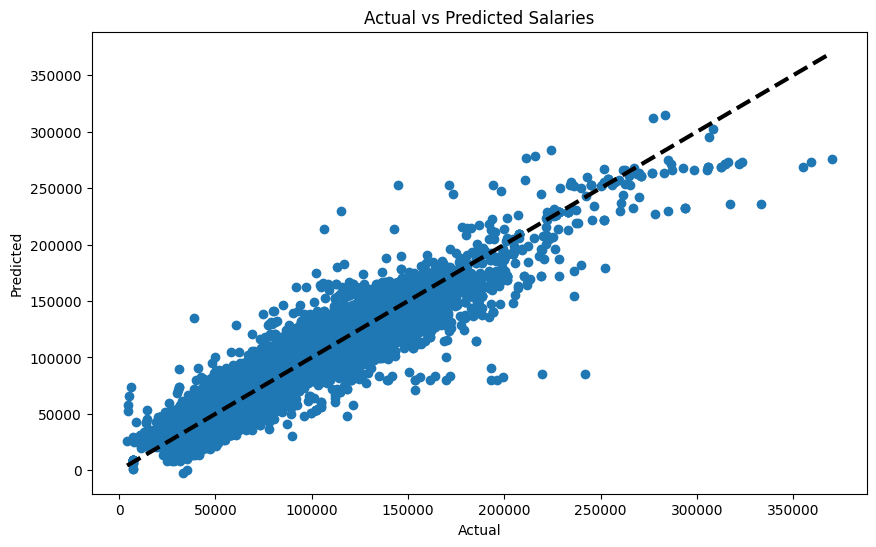

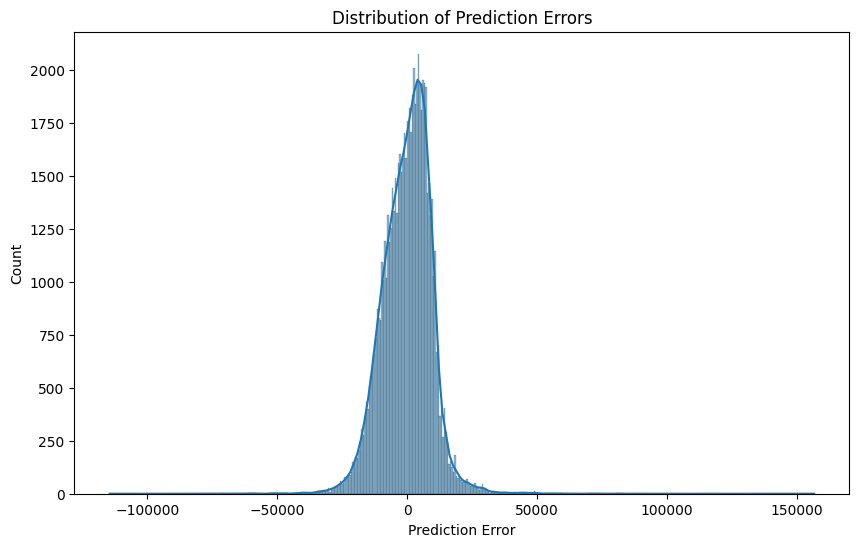

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted salaries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salaries')
plt.show()

# Distribution of errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()


In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 89918840.88932638
R^2 Score: 0.8909325510956102


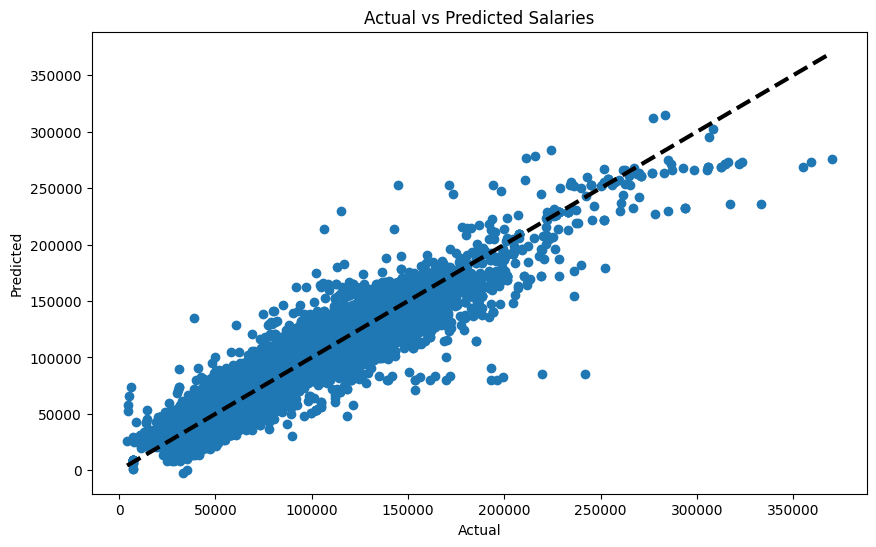

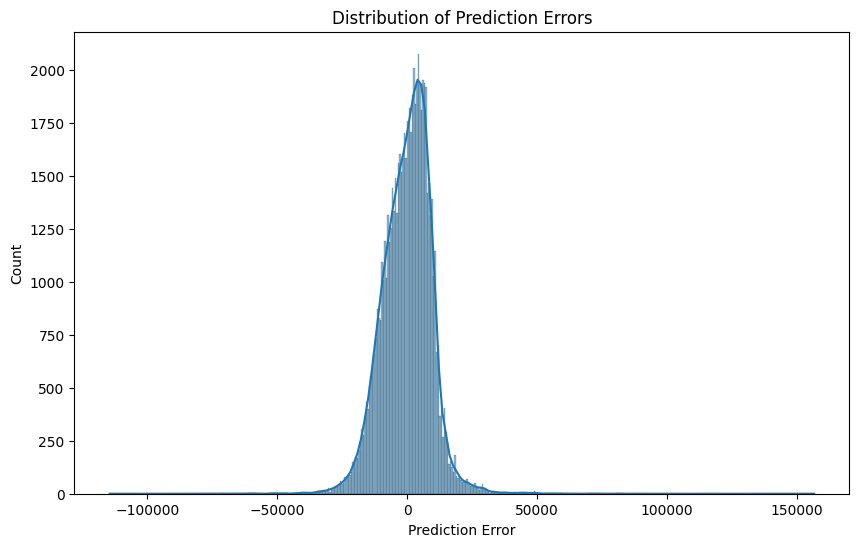

In [18]:
# Plotting actual vs predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salaries')
plt.show()

# Distribution of errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()


In [20]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("HR Salary Dashboard"),
    dcc.Graph(id='actual-vs-predicted'),
    dcc.Graph(id='error-distribution')
])

# Callback to update the graphs
@app.callback(
    [Output('actual-vs-predicted', 'figure'),
     Output('error-distribution', 'figure')],
    [Input('actual-vs-predicted', 'value')]
)
def update_graphs(value):
    # Actual vs Predicted Scatter Plot
    fig1 = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'},
                      title='Actual vs Predicted Salaries')
    fig1.add_shape(
        type='line',
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max(),
        line=dict(color='Red',)
    )

    # Error Distribution Histogram
    errors = y_test - y_pred
    fig2 = px.histogram(errors, nbins=50, labels={'value': 'Prediction Error'},
                        title='Distribution of Prediction Errors', marginal="rug")

    return fig1, fig2

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



In [21]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("HR Salary Dashboard"),
    dcc.Graph(id='actual-vs-predicted'),
    dcc.Graph(id='error-distribution')
])

# Callback to update the graphs
@app.callback(
    [Output('actual-vs-predicted', 'figure'),
     Output('error-distribution', 'figure')],
    [Input('actual-vs-predicted', 'id')]  # Dummy input to trigger the callback
)
def update_graphs(_):
    # Actual vs Predicted Scatter Plot
    fig1 = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'},
                      title='Actual vs Predicted Salaries')
    fig1.add_shape(
        type='line',
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max(),
        line=dict(color='Red',)
    )

    # Error Distribution Histogram
    errors = y_test - y_pred
    fig2 = px.histogram(errors, nbins=50, labels={'value': 'Prediction Error'},
                        title='Distribution of Prediction Errors', marginal="rug")

    return fig1, fig2

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [22]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Assuming you have already trained the pipeline with your data
# Load the dataset
df = pd.read_csv('HR_SALARY_REPORT.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Assuming 'SALARY (ANNUAL)' is the target variable we want to predict
X = df.drop('SALARY (ANNUAL)', axis=1)
y = df['SALARY (ANNUAL)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
numeric_features = ['FISCAL YEAR', 'AGENCY #']
numeric_transformer = StandardScaler()

categorical_features = ['AGENCY', 'CLASSIFICATION', 'FULL/PART TIME', 'SERVICE TYPE']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data and then fits a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("HR Salary Dashboard"),
    dcc.Graph(id='actual-vs-predicted'),
    dcc.Graph(id='error-distribution'),
    html.H2("Predict Salary"),
    html.Div([
        html.Label('FISCAL YEAR'),
        dcc.Input(id='input-fiscal-year', type='number', value=2023),
        html.Br(),
        html.Label('AGENCY'),
        dcc.Input(id='input-agency', type='text', value='Example Agency'),
        html.Br(),
        html.Label('CLASSIFICATION'),
        dcc.Input(id='input-classification', type='text', value='Example Classification'),
        html.Br(),
        html.Label('FULL/PART TIME'),
        dcc.Input(id='input-full-part-time', type='text', value='FULL'),
        html.Br(),
        html.Label('SERVICE TYPE'),
        dcc.Input(id='input-service-type', type='text', value='Example Service Type'),
        html.Br(),
        html.Label('AGENCY #'),
        dcc.Input(id='input-agency-number', type='number', value=1),
        html.Br(),
        html.Button('Predict Salary', id='predict-button', n_clicks=0),
        html.Div(id='prediction-output', style={'margin-top': '20px'})
    ])
])

# Callback to update the graphs
@app.callback(
    [Output('actual-vs-predicted', 'figure'),
     Output('error-distribution', 'figure')],
    [Input('actual-vs-predicted', 'id')]
)
def update_graphs(_):
    # Actual vs Predicted Scatter Plot
    fig1 = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'},
                      title='Actual vs Predicted Salaries')
    fig1.add_shape(
        type='line',
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max(),
        line=dict(color='Red',)
    )

    # Error Distribution Histogram
    errors = y_test - y_pred
    fig2 = px.histogram(errors, nbins=50, labels={'value': 'Prediction Error'},
                        title='Distribution of Prediction Errors', marginal="rug")

    return fig1, fig2

# Callback to predict salary based on user input
@app.callback(
    Output('prediction-output', 'children'),
    Input('predict-button', 'n_clicks'),
    State('input-fiscal-year', 'value'),
    State('input-agency', 'value'),
    State('input-classification', 'value'),
    State('input-full-part-time', 'value'),
    State('input-service-type', 'value'),
    State('input-agency-number', 'value')
)
def predict_salary(n_clicks, fiscal_year, agency, classification, full_part_time, service_type, agency_number):
    if n_clicks > 0:
        # Create a DataFrame from the input values
        input_data = pd.DataFrame({
            'FISCAL YEAR': [fiscal_year],
            'AGENCY': [agency],
            'CLASSIFICATION': [classification],
            'FULL/PART TIME': [full_part_time],
            'SERVICE TYPE': [service_type],
            'AGENCY #': [agency_number]
        })

        # Make prediction
        predicted_salary = pipeline.predict(input_data)[0]
        return f'Predicted Salary: ${predicted_salary:.2f}'

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


ValueError: Input y contains NaN.

In [23]:
# Drop rows where the target variable 'SALARY (ANNUAL)' is NaN
df = df.dropna(subset=['SALARY (ANNUAL)'])

# Assuming 'SALARY (ANNUAL)' is the target variable we want to predict
X = df.drop('SALARY (ANNUAL)', axis=1)
y = df['SALARY (ANNUAL)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
numeric_features = ['FISCAL YEAR', 'AGENCY #']
numeric_transformer = StandardScaler()

categorical_features = ['AGENCY', 'CLASSIFICATION', 'FULL/PART TIME', 'SERVICE TYPE']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data and then fits a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("HR Salary Dashboard"),
    dcc.Graph(id='actual-vs-predicted'),
    dcc.Graph(id='error-distribution'),
    html.H2("Predict Salary"),
    html.Div([
        html.Label('FISCAL YEAR'),
        dcc.Input(id='input-fiscal-year', type='number', value=2023),
        html.Br(),
        html.Label('AGENCY'),
        dcc.Input(id='input-agency', type='text', value='Example Agency'),
        html.Br(),
        html.Label('CLASSIFICATION'),
        dcc.Input(id='input-classification', type='text', value='Example Classification'),
        html.Br(),
        html.Label('FULL/PART TIME'),
        dcc.Input(id='input-full-part-time', type='text', value='FULL'),
        html.Br(),
        html.Label('SERVICE TYPE'),
        dcc.Input(id='input-service-type', type='text', value='Example Service Type'),
        html.Br(),
        html.Label('AGENCY #'),
        dcc.Input(id='input-agency-number', type='number', value=1),
        html.Br(),
        html.Button('Predict Salary', id='predict-button', n_clicks=0),
        html.Div(id='prediction-output', style={'margin-top': '20px'})
    ])
])

# Callback to update the graphs
@app.callback(
    [Output('actual-vs-predicted', 'figure'),
     Output('error-distribution', 'figure')],
    [Input('actual-vs-predicted', 'id')]
)
def update_graphs(_):
    # Actual vs Predicted Scatter Plot
    fig1 = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'},
                      title='Actual vs Predicted Salaries')
    fig1.add_shape(
        type='line',
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max(),
        line=dict(color='Red',)
    )

    # Error Distribution Histogram
    errors = y_test - y_pred
    fig2 = px.histogram(errors, nbins=50, labels={'value': 'Prediction Error'},
                        title='Distribution of Prediction Errors', marginal="rug")

    return fig1, fig2

# Callback to predict salary based on user input
@app.callback(
    Output('prediction-output', 'children'),
    Input('predict-button', 'n_clicks'),
    State('input-fiscal-year', 'value'),
    State('input-agency', 'value'),
    State('input-classification', 'value'),
    State('input-full-part-time', 'value'),
    State('input-service-type', 'value'),
    State('input-agency-number', 'value')
)
def predict_salary(n_clicks, fiscal_year, agency, classification, full_part_time, service_type, agency_number):
    if n_clicks > 0:
        # Create a DataFrame from the input values
        input_data = pd.DataFrame({
            'FISCAL YEAR': [fiscal_year],
            'AGENCY': [agency],
            'CLASSIFICATION': [classification],
            'FULL/PART TIME': [full_part_time],
            'SERVICE TYPE': [service_type],
            'AGENCY #': [agency_number]
        })

        # Make prediction
        predicted_salary = pipeline.predict(input_data)[0]
        return f'Predicted Salary: ${predicted_salary:.2f}'

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning:

Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning:

Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros



In [27]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('HR_SALARY_REPORT.csv')

# Display column names to verify the exact names
print(df.columns)

# Adjust the column name based on the exact name found in the dataset
salary_column = 'SALARY (ANNUAL) '  # Make sure this matches the exact column name in your dataset

# Drop rows where the target variable 'SALARY (ANNUAL) ' is NaN
df = df.dropna(subset=[salary_column])

# Assuming 'SALARY (ANNUAL) ' is the target variable we want to predict
X = df[['FISCAL YEAR']]
y = df[salary_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical features
numeric_features = ['FISCAL YEAR']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a pipeline that first transforms the data and then fits a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("HR Salary Dashboard"),
    dcc.Graph(id='actual-vs-predicted'),
    dcc.Graph(id='error-distribution'),
    html.H2("Predict Salary"),
    html.Div([
        html.Label('FISCAL YEAR'),
        dcc.Input(id='input-fiscal-year', type='number', value=2023),
        html.Br(),
        html.Button('Predict Salary', id='predict-button', n_clicks=0),
        html.Div(id='prediction-output', style={'margin-top': '20px'})
    ])
])

# Callback to update the graphs
@app.callback(
    [Output('actual-vs-predicted', 'figure'),
     Output('error-distribution', 'figure')],
    [Input('actual-vs-predicted', 'id')]
)
def update_graphs(_):
    # Actual vs Predicted Scatter Plot
    fig1 = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'},
                      title='Actual vs Predicted Salaries')
    fig1.add_shape(
        type='line',
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max(),
        line=dict(color='Red',)
    )

    # Error Distribution Histogram
    errors = y_test - y_pred
    fig2 = px.histogram(errors, nbins=50, labels={'value': 'Prediction Error'},
                        title='Distribution of Prediction Errors', marginal="rug")

    return fig1, fig2

# Callback to predict salary based on user input
@app.callback(
    Output('prediction-output', 'children'),
    Input('predict-button', 'n_clicks'),
    State('input-fiscal-year', 'value')
)
def predict_salary(n_clicks, fiscal_year):
    if n_clicks > 0:
        # Create a DataFrame from the input value
        input_data = pd.DataFrame({'FISCAL YEAR': [fiscal_year]})

        # Make prediction
        predicted_salary = pipeline.predict(input_data)[0]
        return f'Predicted Salary: ${predicted_salary:.2f}'

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Index(['FISCAL YEAR', 'AGENCY', 'CLASSIFICATION', 'SALARY (ANNUAL) ',
       'FULL/PART TIME', 'SERVICE TYPE', 'AGENCY #'],
      dtype='object')


In [1]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('HR_SALARY_REPORT.csv')

# Display column names to verify the exact names
print(df.columns)

# Adjust the column name based on the exact name found in the dataset
salary_column = 'SALARY (ANNUAL) '  # Make sure this matches the exact column name in your dataset

# Drop rows where the target variable 'SALARY (ANNUAL) ' is NaN
df = df.dropna(subset=[salary_column])

# Assuming 'SALARY (ANNUAL) ' is the target variable we want to predict
X = df[['FISCAL YEAR']]
y = df[salary_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical features
numeric_features = ['FISCAL YEAR']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a pipeline that first transforms the data and then fits a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("HR Salary Dashboard"),
    dcc.Graph(id='actual-vs-predicted'),
    dcc.Graph(id='error-distribution'),
    html.H2("Predict Salary"),
    html.Div([
        html.Label('FISCAL YEAR'),
        dcc.Input(id='input-fiscal-year', type='number', value=2023),
        html.Br(),
        html.Button('Predict Salary', id='predict-button', n_clicks=0),
        html.Div(id='prediction-output', style={'margin-top': '20px'})
    ])
])

# Callback to update the graphs
@app.callback(
    [Output('actual-vs-predicted', 'figure'),
     Output('error-distribution', 'figure')],
    [Input('actual-vs-predicted', 'id')]
)
def update_graphs(_):
    # Actual vs Predicted Scatter Plot
    fig1 = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'},
                      title='Actual vs Predicted Salaries')
    fig1.add_shape(
        type='line',
        x0=y_test.min(), y0=y_test.min(),
        x1=y_test.max(), y1=y_test.max(),
        line=dict(color='Red',)
    )

    # Error Distribution Histogram
    errors = y_test - y_pred
    fig2 = px.histogram(errors, nbins=50, labels={'value': 'Prediction Error'},
                        title='Distribution of Prediction Errors', marginal="rug")

    return fig1, fig2

# Callback to predict salary based on user input
@app.callback(
    Output('prediction-output', 'children'),
    Input('predict-button', 'n_clicks'),
    State('input-fiscal-year', 'value')
)
def predict_salary(n_clicks, fiscal_year):
    if n_clicks > 0:
        # Create a DataFrame from the input value
        input_data = pd.DataFrame({'FISCAL YEAR': [fiscal_year]})

        # Make prediction
        predicted_salary = pipeline.predict(input_data)[0]
        return f'Predicted Salary: ${predicted_salary:.2f}'

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Index(['FISCAL YEAR', 'AGENCY', 'CLASSIFICATION', 'SALARY (ANNUAL) ',
       'FULL/PART TIME', 'SERVICE TYPE', 'AGENCY #'],
      dtype='object')
